## DATA SCIENCE
Prasunet_DS_02


TASK-02

 Perform data cleaning and exploratory data analysis (EDA) on a dataset
 of your choice, such as the Titanic dataset from Kaggle. Explore the
 relationships between variables and identify patterns and trends in the
 data

## Sample Dataset:
   https://www.kaggle.com/c/titanic/data
    

Programmer :MANIKANDAN K

https://www.linkedin.com/in/mani-kandan-812b48250/

## STEP 1 : Load the Data
First, we load the data from the provided CSV files and inspect the first few rows to understand the structure and content of the datasets.

In [23]:
#IMPORT PANDAS
import pandas as pd

In [24]:
# Load datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_df = pd.read_csv('/content/gender_submission.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

print("\nGender Submission Dataset:")
print(gender_submission_df.head())

Train Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

## Step 2: Data Cleaning
We'll handle missing values, correct data types, and perform any necessary transformations.

1. **Identify Missing Values**: We start by checking for missing values in each dataset.


2. Handle Missing Values:

  1. **Age**: Fill missing values with the median age.
  2. **Embarked**: Fill missing values with the mode (most frequent value).
  3. **Fare**: Fill missing values with the median fare in the test dataset.
  4. **Cabin**: Drop the 'Cabin' column as it has too many missing values.

In [25]:
# Check for missing values
print("Missing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

# Fill missing values for 'Age' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing values for 'Fare' in test dataset with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Check if 'Cabin' column exists before dropping
if 'Cabin' in train_df.columns:
    train_df.drop(columns='Cabin', inplace=True)

if 'Cabin' in test_df.columns:
    test_df.drop(columns='Cabin', inplace=True)

# Verify no missing values remain
print("\nMissing values in train dataset after cleaning:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset after cleaning:")
print(test_df.isnull().sum())

Missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values in train dataset after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values in test dataset after cleaning:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtyp

## Step 3: Exploratory Data Analysis (EDA)

We'll explore the relationships between variables and identify patterns and trends in the data.

1. **Correlation Heatmap**: Visualize the correlation between numerical variables.

2. **Survival Distribution by Gender**: Explore the relationship between survival and gender.

3.  **Survival Distribution by Class**: Explore the relationship between survival and passenger class.

4. **Age Distribution by Survival**: Examine how age distribution varies with survival status.

5. **Fare Distribution by Class**: Analyze the distribution of fares paid by different passenger classes.

In [26]:
#import seaborn
#import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

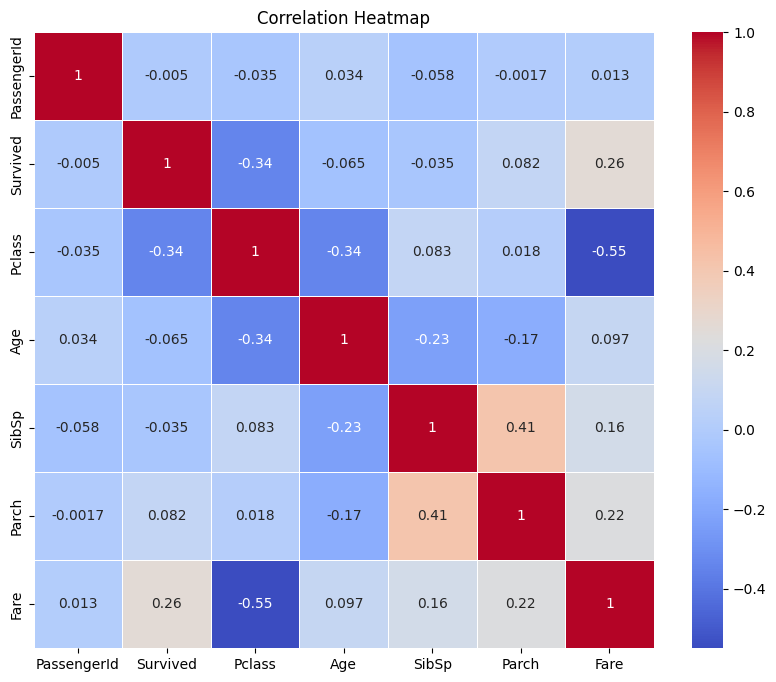

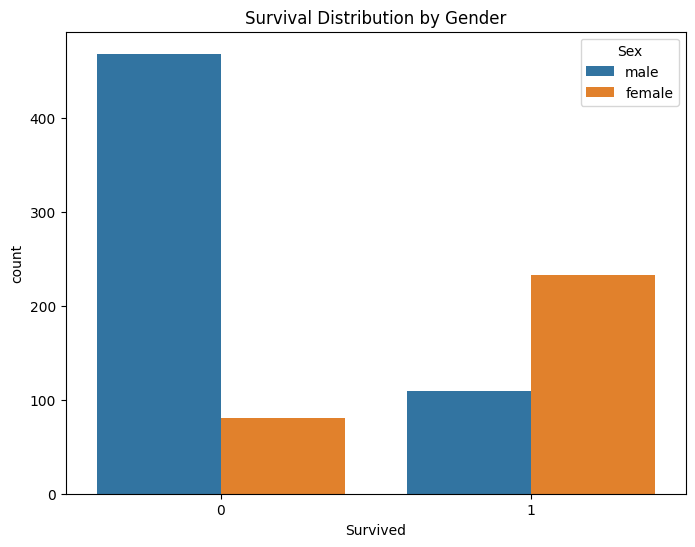

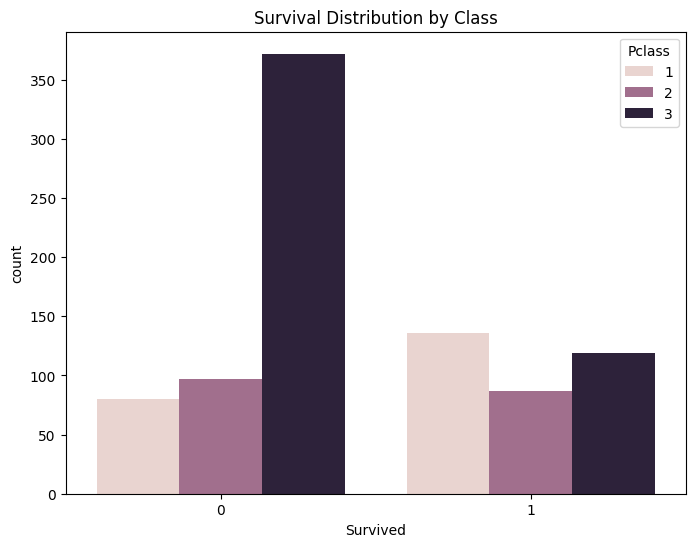

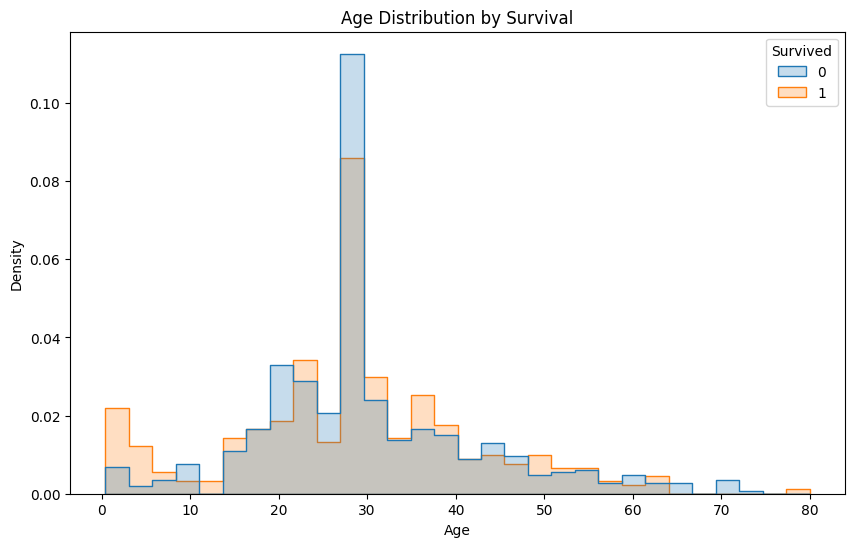

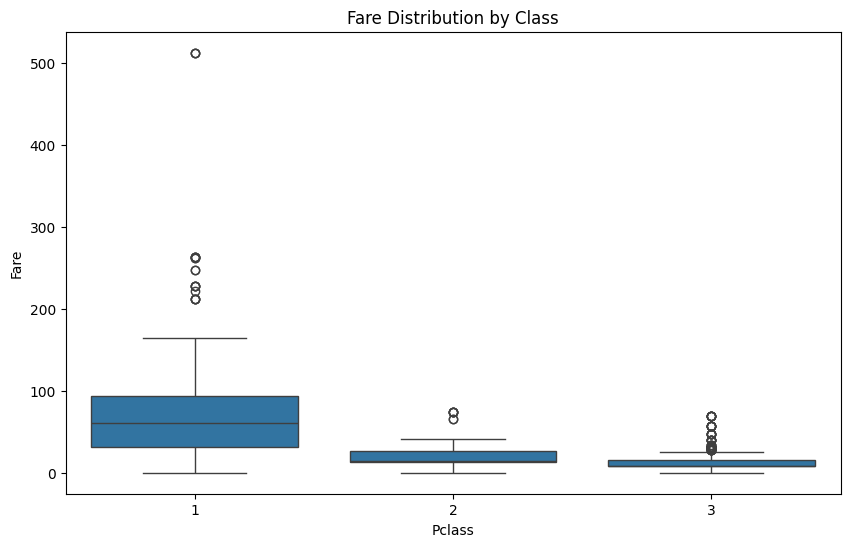

In [27]:
# Select only numeric columns for correlation calculation
numeric_df = train_df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Distribution by Gender')
plt.show()

# Distribution of survival by class
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Distribution by Class')
plt.show()

# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival')
plt.show()

# Fare distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Class')
plt.show()


This script will load the data, clean it, and perform some basic EDA to explore relationships and identify patterns.

## step 4 : Additional EDA
We can further explore the data with additional visualizations and analyses.

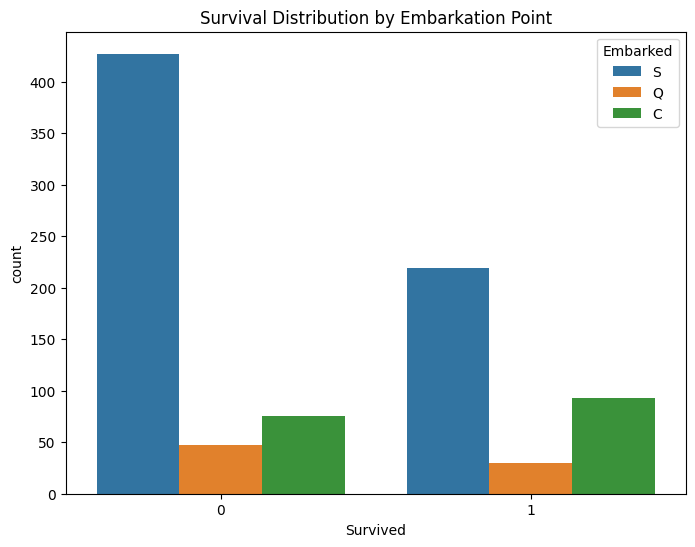

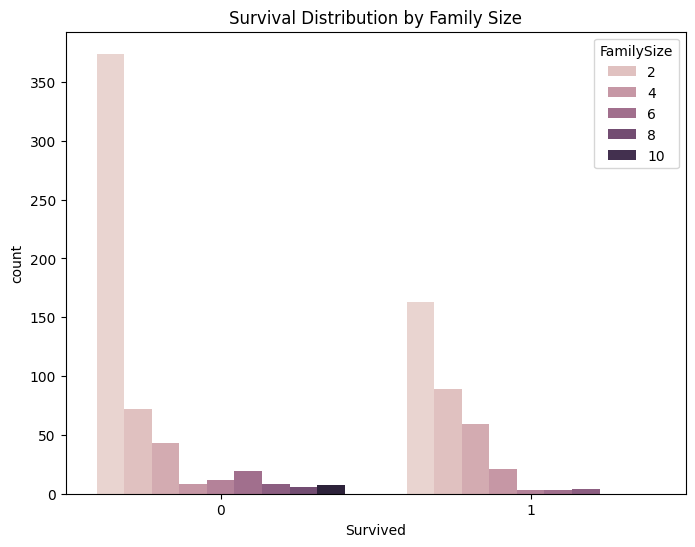

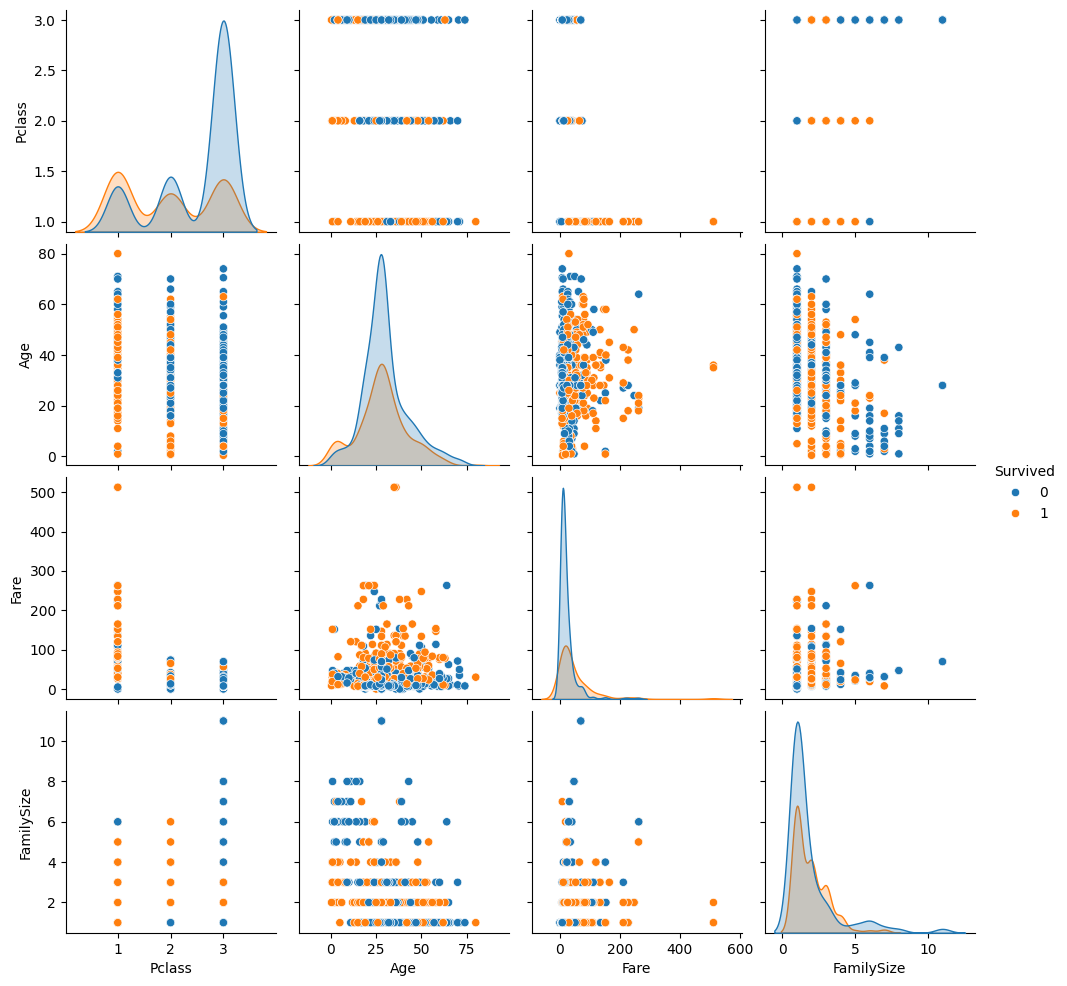

In [28]:
#Survival Rate by Embarkation Point
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Embarked', data=train_df)
plt.title('Survival Distribution by Embarkation Point')
plt.show()

#Survival Rate by Family Size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='FamilySize', data=train_df)
plt.title('Survival Distribution by Family Size')
plt.show()

#Pair Plot of Important Features
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived', diag_kind='kde')
plt.show()



##Conclusion:

This analysis provides a comprehensive overview of the Titanic dataset, highlighting key relationships and patterns. The steps include loading the data, cleaning it, and performing exploratory data analysis to uncover insights.